In [2]:
pip install pytrends matplotlib pandas seaborn plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# setup pytrend library and keyword define

In [4]:
pytrends = TrendReq(hl = 'en-US', tz=360)
Keyword="Data Analyst"

# Data Request

In [19]:
pytrends.build_payload([Keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

# Country Wise Interest

In [20]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=Keyword, ascending=False).head(15)
print(region_data)

                      Data Analyst
geoName                           
India                          100
Nigeria                         90
Kenya                           76
Singapore                       70
South Africa                    62
United Kingdom                  56
Ghana                           52
Sri Lanka                       51
Canada                          48
Ireland                         46
United States                   45
United Arab Emirates            42
Pakistan                        40
Nepal                           39
Tunisia                         39


C:\Users\bindu\AppData\Local\Temp\ipykernel_3132\3285088311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=region_data[Keyword], y=region_data.index, palette="Blues_d")


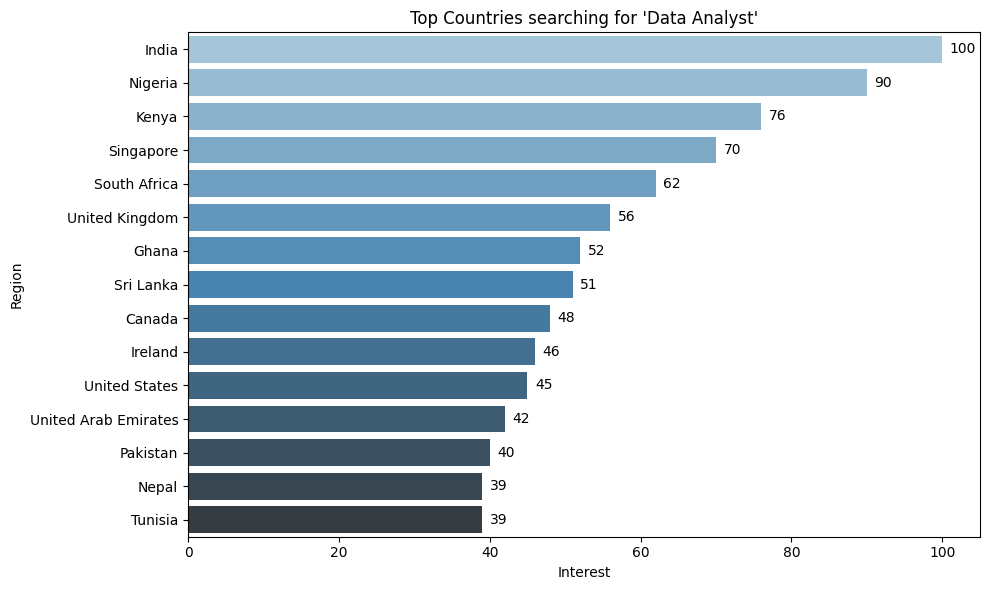

In [26]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=region_data[Keyword], y=region_data.index, palette="Blues_d")
plt.title(f"Top Countries searching for '{Keyword}'")
plt.xlabel("Interest")
plt.ylabel("Region")

# Add data labels 
for i, value in enumerate(region_data[Keyword]):
    plt.text(value + 1, i, str(round(value, 1)), va='center')

plt.tight_layout()
plt.show()


# world map

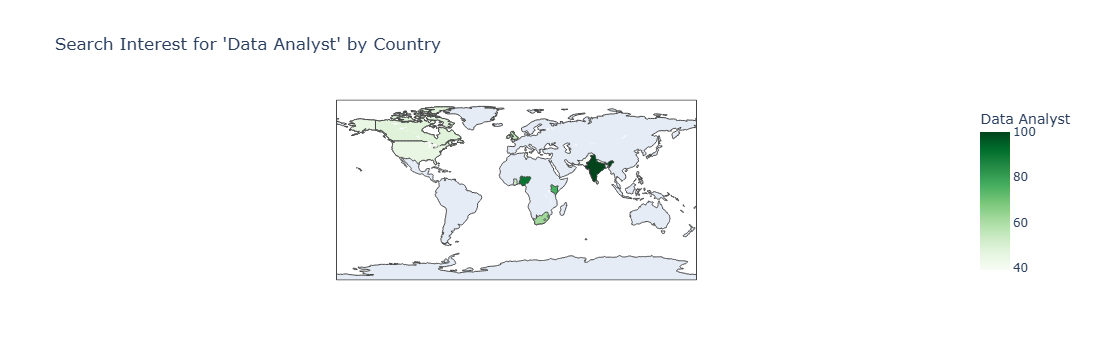

In [39]:
region_data = region_data.reset_index()

fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=Keyword,
                    title=f"Search Interest for '{Keyword}' by Country",
                    color_continuous_scale='Greens',
                    hover_name='geoName',  # Show country name
                    hover_data={Keyword: True})  # Show interest value

fig.show()


# Time wise Interest

C:\Users\bindu\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



            Data Analyst  isPartial
date                               
2024-06-30            81      False
2024-07-07            88      False
2024-07-14            90      False
2024-07-21            89      False
2024-07-28            90      False


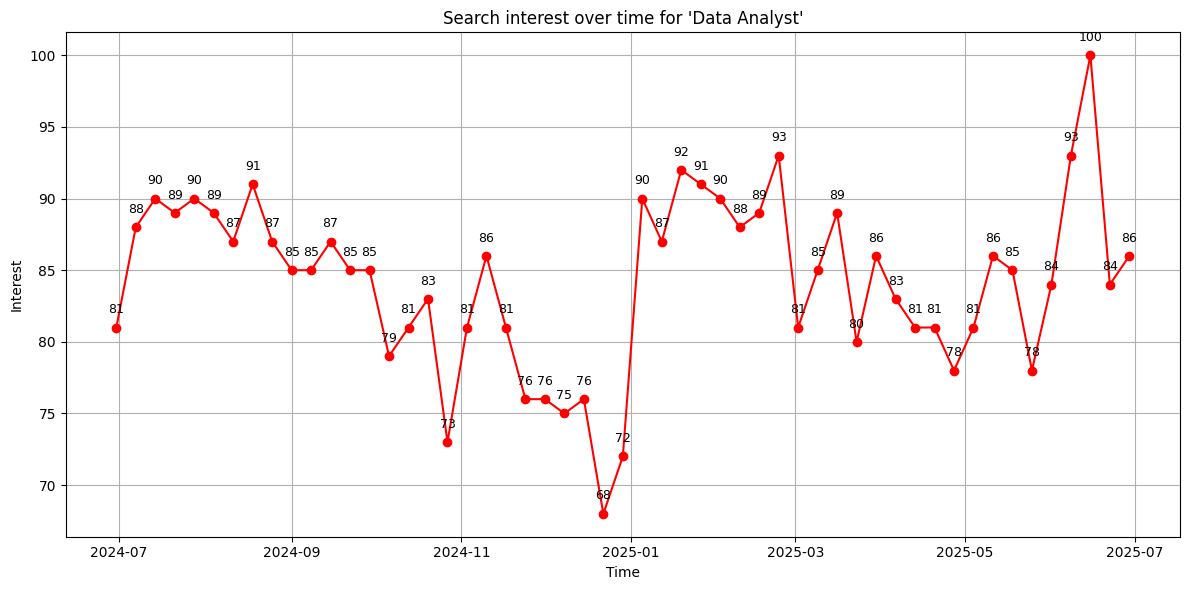

In [38]:

# Get the interest over time data
time_df = pytrends.interest_over_time()

# Check if the 'time_df' DataFrame contains data
print(time_df.head())

# Plotting the data
plt.figure(figsize=(12, 6))

# Plotting the keyword's interest over time
plt.plot(time_df.index, time_df[Keyword], marker='o', color='red')
for x, y in zip(time_df.index, time_df[Keyword]):
    plt.text(x, y + 1, str(y), ha='center', fontsize=9)

# Adding title and labels
plt.title(f"Search interest over time for '{Keyword}'")
plt.xlabel("Time")
plt.ylabel("Interest")
plt.grid(True)

plt.tight_layout()

# Display the plot
plt.show()

# Multiple Keywords Compare

In [40]:
kw_list = ["artificial intelligence", "data science", "machine learning", "Data Analyst"]
pytrends.build_payload(kw_list, cat=0, timeframe= 'today 12-m', geo='',gprop='')

C:\Users\bindu\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



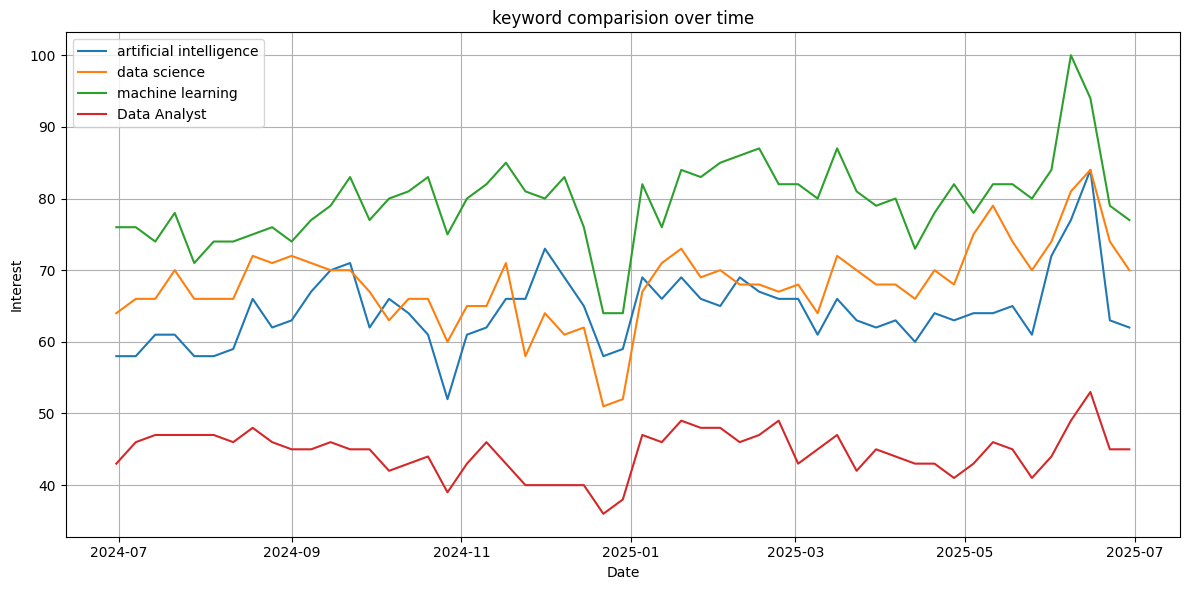

In [44]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("keyword comparision over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparisons

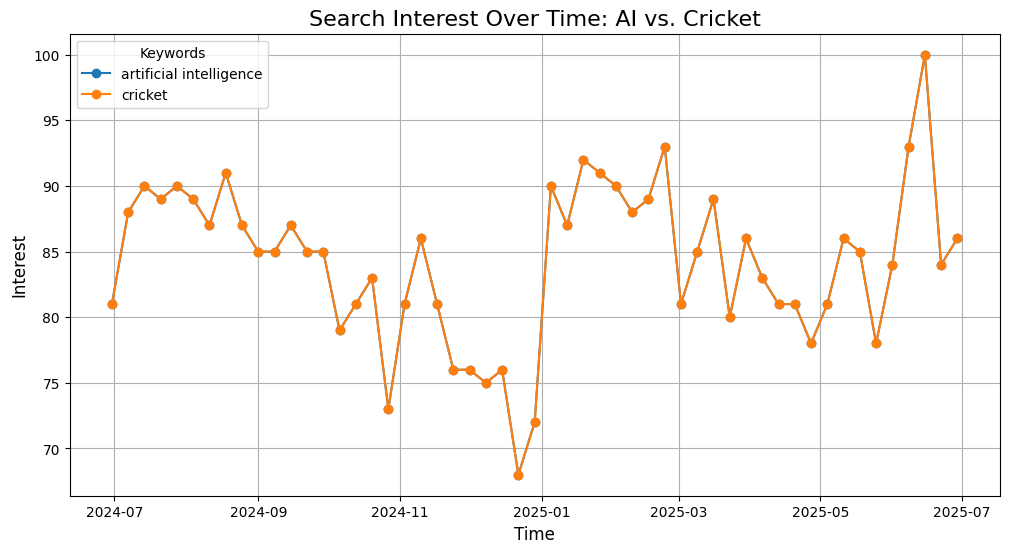

In [49]:
import warnings
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)
# List of keywords you want to analyze
Keywords = ["artificial intelligence", "cricket"]

# Create a figure for the plots
plt.figure(figsize=(12, 6))

# Loop through each keyword and plot its interest over time
for keyword in Keywords:
    pytrends.build_payload([Keyword], cat=0, timeframe='today 12-m', geo='', gprop='')
    
    # Get the interest over time data
    time_df = pytrends.interest_over_time()
    
    # Plot each keyword's interest over time
    if not time_df.empty:  # Check if data is available
        plt.plot(time_df.index, time_df[Keyword], marker='o', label=keyword)

# Adding title, labels, and legend
plt.title("Search Interest Over Time: AI vs. Cricket", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Interest", fontsize=12)
plt.legend(title="Keywords", loc='upper left')

# Display the plot
plt.grid(True)  # Optional: adds gridlines for better readability
plt.show()